In [1]:
from matplotlib import pyplot as plt
from slab import datamanagement
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
%matplotlib inline
%config InlineBackend.figure_format='retina'
from tabulate import tabulate

data_dir = r'S:\_Data\160216 -M007 Trident Hybrid Coupler setup\data'
exp_dir = r'S:\_Data\160216 -M007 Trident Hybrid Coupler setup\experiment'
nbfig_dir = r'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\IPython Notebooks\Figures'

sys.path.append(exp_dir)
sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal, static_surface, trap_analysis

from tabulate import tabulate

## Coupler length sweep

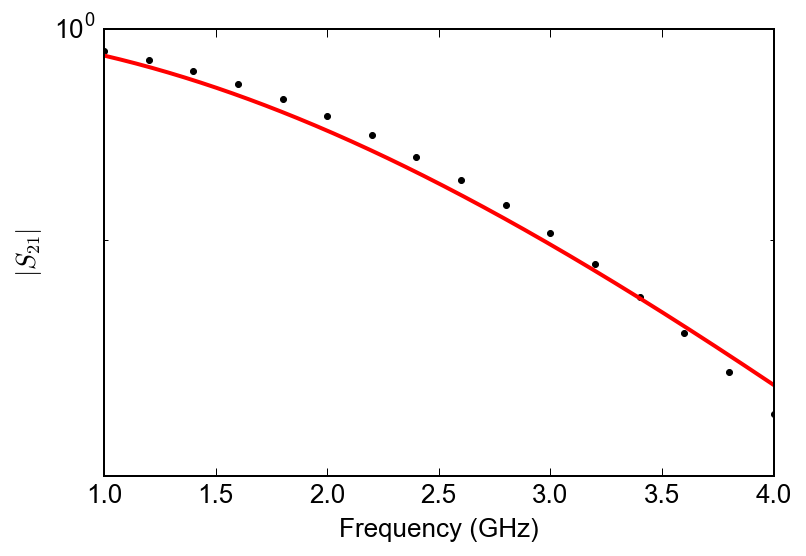

In [65]:
dpath = r'S:\Gerwin\Electron on helium\HFSS\Sloped excitation plane'
dfile = r'1um_length_4um_width_largespan.dat'

coupler_lengths=5.0
l_resonator = 2*3000 #um

data = loadtxt(os.path.join(dpath, dfile))

fpts = array(data[:,0], dtype=float64)
S21 = dataanalysis.dBm_to_W(array(data[:,1], dtype=float64))*1E3

L = 2.6E-9
Z0 = 50.
fplot = linspace(min(fpts), max(fpts), 1E3)
S21_inductor = abs(2/(2. + 1j*2*pi*fplot*1E9*L/Z0))

plt.figure(figsize=(6.,4.))
common.configure_axes(13)

plt.plot(fpts, S21, '.k')
plt.plot(fplot, S21_inductor, '-r', lw=2.0)
plt.xlabel('Frequency (GHz)')
plt.ylabel('$|S_{21}|$')
plt.yscale('log')
plt.xlim(1, 4)
plt.ylim(0.8, 1)

#center = fpts[argmax(S21)]
#fitspan = 0.10
#fitdomain = (center-fitspan/2., center+fitspan/2.)

#fit_guess = [center, fitspan/40., 0, 0.030]
freqs = linspace(fitdomain[0], fitdomain[1], 1E3)

#try:
#    fr, ferr = dsfit.fitlor_asym(fpts, S21, fitparams=fit_guess, domain=fitdomain, verbose=True)
#    plt.plot(freqs, dsfit.asym_lorfunc(freqs, *fr), '-r', lw=2.0)
#except:
#    plt.plot(freqs, dsfit.asym_lorfunc(freqs, *fit_guess), '-r', lw=2.0)

#plt.xlim(fitdomain)

#print "\nQ = %d"%(fr[0]/fr[1])

f0 : 9.890610 +/- 0.000020
FWHM : 0.008028 +/- 0.000023
Gamma : -0.060028 +/- 0.000767
Amplitude : 0.972591 +/- 0.001081

Q = 1231
f0 : 9.868260 +/- 0.000013
FWHM : 0.010112 +/- 0.000036
Gamma : -0.061526 +/- 0.000636
Amplitude : 0.970304 +/- 0.001314

Q = 975
f0 : 9.818041 +/- 0.000013
FWHM : 0.011651 +/- 0.000034
Gamma : -0.075979 +/- 0.000593
Amplitude : 0.957734 +/- 0.001071

Q = 842
f0 : 9.766990 +/- 0.000015
FWHM : 0.014051 +/- 0.000032
Gamma : -0.083442 +/- 0.000571
Amplitude : 0.950707 +/- 0.000880

Q = 695
=========  =====  ========
 lc (um)    f0       Qc
=========  =====  ========
  1.000    9.891  1231.988
  5.000    9.868  975.924
 20.000    9.818  842.686
 40.000    9.767  695.094
=========  =====  ========


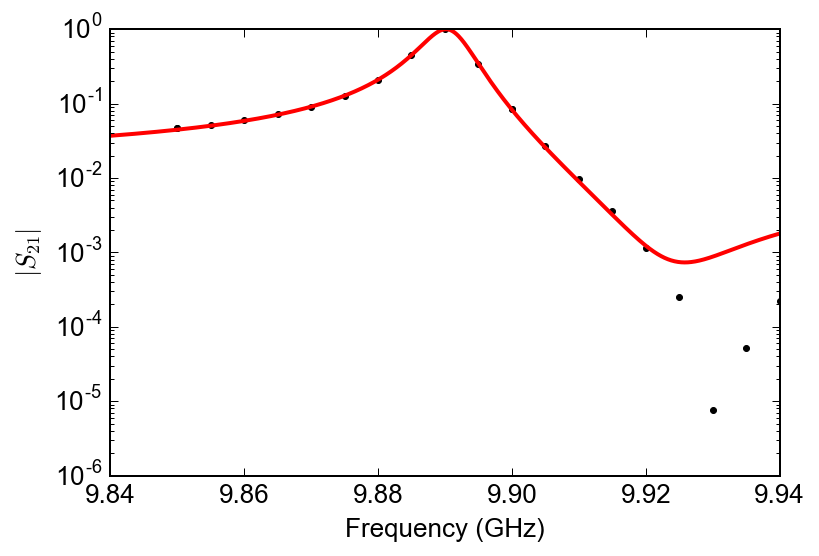

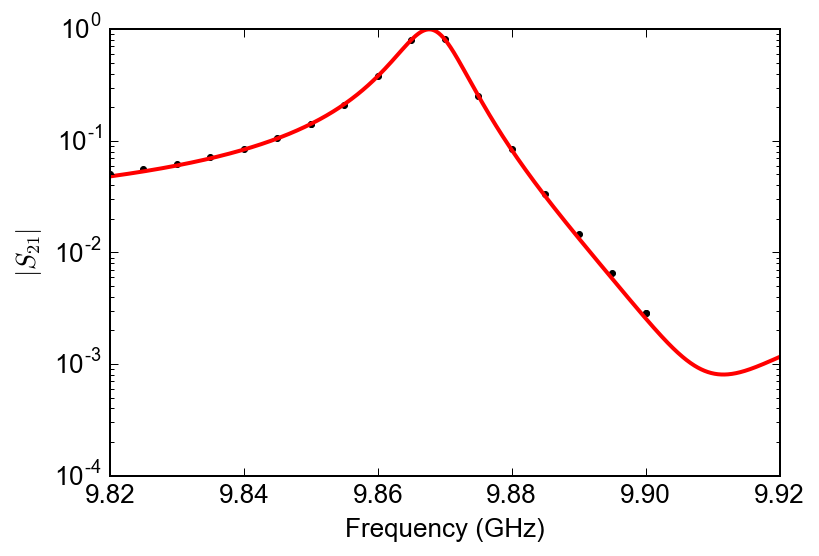

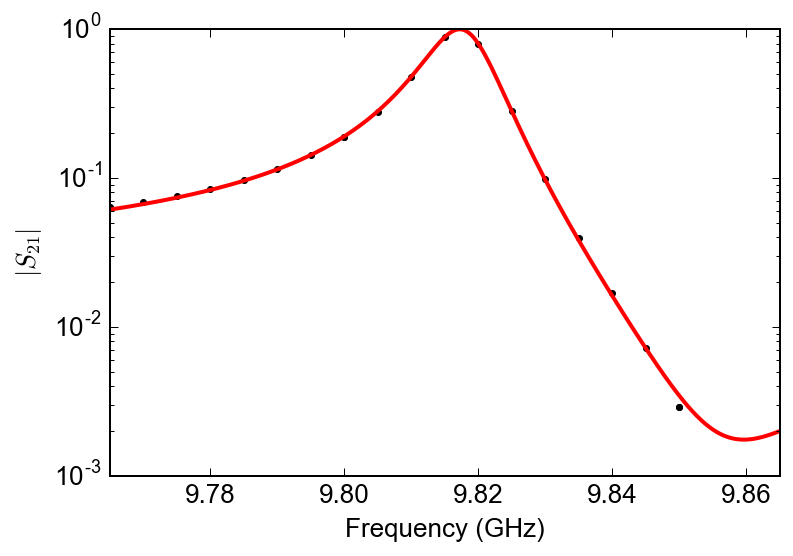

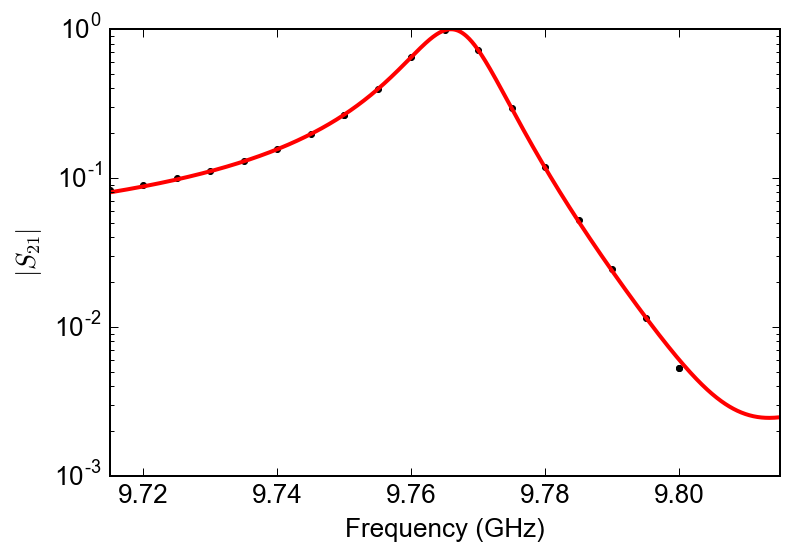

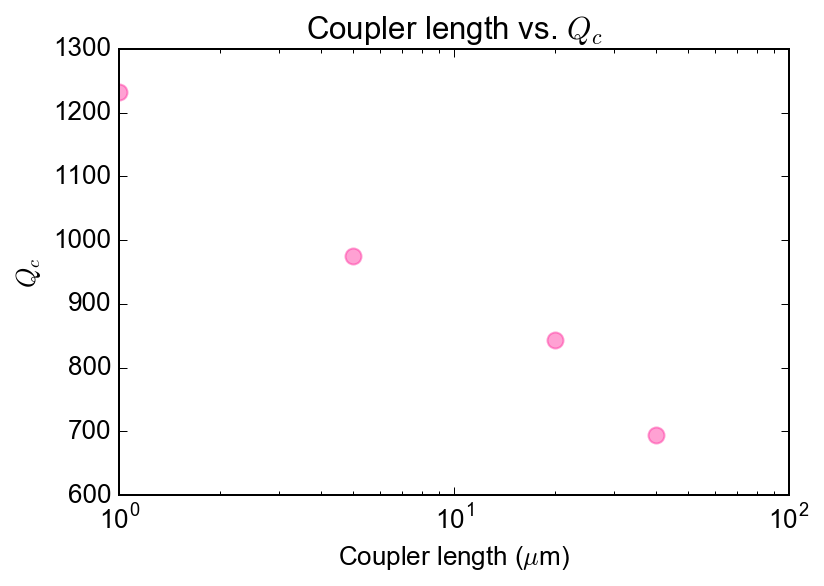

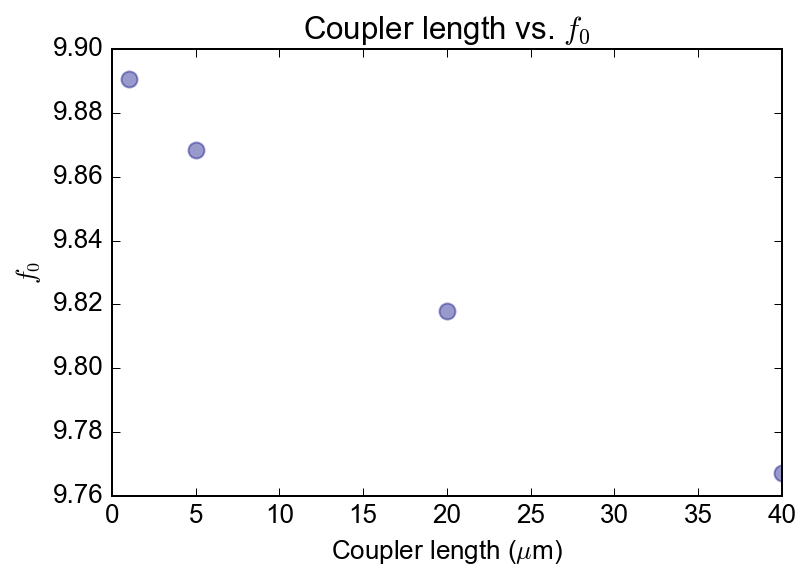

In [36]:
dpath = r'S:\Gerwin\Electron on helium\HFSS\Sloped excitation plane'
dfiles = [r'1um_length_4um_width.dat', 
          r'5um_length_4um_width.dat',
          r'20um_length_4um_width.dat',
          r'40um_length_4um_width.dat']

coupler_lengths=[1.0, 5.0, 20.0, 40.0]
fitspans = [0.100, 0.100, 0.100, 0.100]
Qs = list()
f0s = list()
l_resonator = 2*3000 #um

for k,dfile in enumerate(dfiles): 
    data = loadtxt(os.path.join(dpath, dfile))

    fpts = array(data[:,0], dtype=float64)
    S21 = dataanalysis.dBm_to_W(array(data[:,1], dtype=float64))*1E3

    plt.figure(figsize=(6.,4.))
    common.configure_axes(13)

    plt.plot(fpts, S21, '.k')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('$|S_{21}|$')
    plt.yscale('log')

    center = fpts[argmax(S21)]
    fitspan = fitspans[k]
    fitdomain = (center-fitspan/2., center+fitspan/2.)

    fit_guess = [center, fitspan/40., -0.06, 1.0]
    freqs = linspace(fitdomain[0], fitdomain[1], 1E3)
    
    try: 
        fr, ferr = dsfit.fitlor_asym(fpts, S21, fitparams=fit_guess, domain=fitdomain, verbose=True)
        plt.plot(freqs, dsfit.asym_lorfunc(freqs, *fr), '-r', lw=2.0)
    except:
        print "Fit failed!"
        plt.plot(freqs, dsfit.asym_lorfunc(freqs, *fit_guess), '-r', lw=2.0)
        
    plt.xlim(fitdomain)

    print "\nQ = %d"%(fr[0]/fr[1])
    
    Qs.append(fr[0]/fr[1])
    f0s.append(fr[0])
    
fig1=plt.figure(figsize=(6.,4.))
common.configure_axes(13)
plt.plot(coupler_lengths, Qs, 'o', **common.plot_opt('deeppink'))

xfit = array(coupler_lengths, dtype=float64)
xplot = linspace(min(xfit), max(xfit), 1E3)
#fr = dsfit.fitexp(xfit, array(Qs, dtype=float64)) 
#plt.plot(xplot, dsfit.expfunc([fr[0], fr[1], fr[2], fr[3]], xplot), lw=2.0, color='k')

plt.xscale('log')
plt.ylabel('$Q_c$')
plt.xlabel('Coupler length ($\mu$m)')
plt.title('Coupler length vs. $Q_c$')
common.save_figure(fig1, save_path=nbfig_dir)

fig2=plt.figure(figsize=(6.,4.))
common.configure_axes(13)
plt.plot(coupler_lengths, f0s, 'o', **common.plot_opt('navy'))
plt.ylabel('$f_0$')
plt.xlabel('Coupler length ($\mu$m)')
plt.title('Coupler length vs. $f_0$')
common.save_figure(fig2, save_path=nbfig_dir)


print tabulate(zip(coupler_lengths, f0s, Qs), headers=['lc (um)', 'f0', 'Qc'], 
               tablefmt="rst", floatfmt=".3f", numalign="center", stralign='center')

### Different width (20 $\mu$m), length = 1 $\mu$m

f0 : 9.903916 +/- 0.000014
FWHM : 0.008032 +/- 0.000040
Gamma : -0.059996 +/- 0.000774
Amplitude : 0.970456 +/- 0.001847

Q = 1233


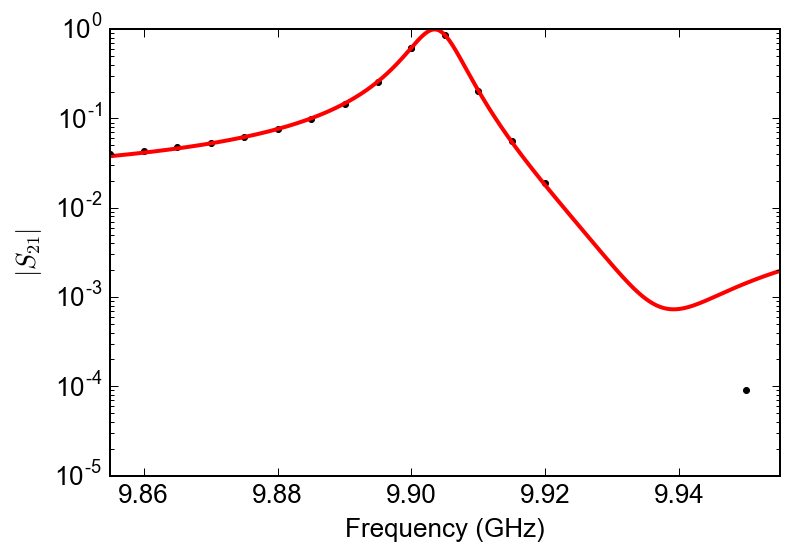

In [70]:
dpath = r'S:\Gerwin\Electron on helium\HFSS\Sloped excitation plane'
dfile = r'1um_length_20um_width.dat'

l_resonator = 2*3000 #um

data = loadtxt(os.path.join(dpath, dfile))

fpts = array(data[:,0], dtype=float64)
S21 = dataanalysis.dBm_to_W(array(data[:,1], dtype=float64))*1E3

plt.figure(figsize=(6.,4.))
common.configure_axes(13)

plt.plot(fpts, S21, '.k')
plt.xlabel('Frequency (GHz)')
plt.ylabel('$|S_{21}|$')
plt.yscale('log')

center = fpts[argmax(S21)]
fitspan = 0.100
fitdomain = (center-fitspan/2., center+fitspan/2.)

fit_guess = [center, fitspan/40., 0, 1.0]
freqs = linspace(fitdomain[0], fitdomain[1], 1E3)

try:
    fr, ferr = dsfit.fitlor_asym(fpts, S21, fitparams=fit_guess, domain=fitdomain, verbose=True)
    plt.plot(freqs, dsfit.asym_lorfunc(freqs, *fr), '-r', lw=2.0)
except:
    plt.plot(freqs, dsfit.asym_lorfunc(freqs, *fit_guess), '-r', lw=2.0)

plt.xlim(fitdomain)


print "\nQ = %d"%(fr[0]/fr[1])